# Keras로 Linear&Logistic Regression 조금 더 맛보기
---

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

## Linear Regression on 쬐금 더 어려운 데이터

In [2]:
# from sklearn.datasets import load_boston
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/boston.csv'
boston = pd.read_csv(path)

In [3]:
# boston = load_boston()

In [4]:
x = boston.data
y = boston.target

x.shape, y.shape

AttributeError: 'DataFrame' object has no attribute 'data'

In [5]:
target = 'medv'

x = boston.drop(target, axis= 1)
y = boston.loc[:, target]

In [16]:
x.shape, y.shape

((506, 13), (506,))

In [46]:
# 모델링: Sequntial API
# 1. 세션 클리어
keras.backend.clear_session()

# 2. 모델 발판 생성
model = keras.models.Sequential()

# 3. 모델 블록 조립
model.add(keras.layers.Input(shape=(13,)))
model.add(keras.layers.Dense(1)) # Dense > activation = (default)'linear'

# 4. 컴파일
model.compile(loss = 'mse', optimizer = 'adam')

In [49]:
model.fit(x, y, epochs = 10, verbose= 1)

Epoch 1/10
16/16 [==============================] - 0s 1ms/step - loss: 6703.1431
Epoch 2/10
16/16 [==============================] - 0s 997us/step - loss: 5537.8237
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 4601.7310
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 3838.8601
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 3219.4470
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 2741.3318
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 2351.8081
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 2056.8584
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 1820.8958
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 1644.3611


In [50]:
print(y)
print(model.predict(x))

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64
16/16 [==============================] - 0s 1ms/step
[[-1.39382305e+01]
 [-3.53573303e+01]
 [-3.03865089e+01]
 [-3.16977749e+01]
 [-3.38041840e+01]
 [-3.43293915e+01]
 [-1.80204334e+01]
 [-2.39340858e+01]
 [-2.62563133e+01]
 [-2.02195091e+01]
 [-2.31298370e+01]
 [-2.04379997e+01]
 [-1.45949898e+01]
 [-2.42024479e+01]
 [-2.51096344e+01]
 [-2.34845848e+01]
 [-1.78213654e+01]
 [-2.72419777e+01]
 [-5.10867739e+00]
 [-2.55848274e+01]
 [-3.00476303e+01]
 [-2.90129910e+01]
 [-3.13950005e+01]
 [-3.26210594e+01]
 [-3.05869884e+01]
 [-1.51054955e+01]
 [-2.68133259e+01]
 [-1.59657059e+01]
 [-2.82254086e+01]
 [-2.57608547e+01]
 [-2.71319923e+01]
 [-2.75585327e+01]
 [-6.49778891e+00]
 [-2.59204750e+01]
 [-8.81218815e+00]
 [-3.06606560e+01]
 [-2.72074833e+01]
 [-2.66911087e+01]
 [-2.49889946e+01]
 [ 2.28669033e+01]
 [ 2.46036873e+

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [52]:
result = pd.DataFrame()
result['y'] = y.values
result['y_pred'] = model.predict(x)
result['diff'] = abs(result['y'] - result['y_pred'])
result

16/16 [==============================] - 0s 1ms/step


,y,y_pred,diff
0,24.0,-13.938231,37.938231
1,21.6,-35.357330,56.957330
2,34.7,-30.386509,65.086509
3,33.4,-31.697775,65.097775
4,36.2,-33.804184,70.004184
...,...,...,...
501,22.4,-28.496384,50.896384
502,20.6,-30.453085,51.053085
503,23.9,-30.897696,54.797696
504,22.0,-30.395983,52.395983


In [53]:
print('R2: ', r2_score(result['y'], result['y_pred']))
print('MAE: ', mean_absolute_error(result['y'], result['y_pred']))
print('MSE: ', mean_squared_error(result['y'], result['y_pred']))

R2:  -17.471441823536875
MAE:  33.36187276463853
MSE:  1559.3509203074161


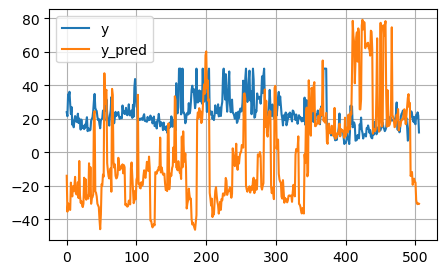

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 3))
plt.plot(range(506), result['y'], label='y')
plt.plot(range(506), result['y_pred'], label = 'y_pred')
plt.legend()
plt.grid()
plt.show()

## Logistic Regression 쬐금 더 어려운 데이터

In [80]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

In [81]:
cancer = load_breast_cancer()

In [82]:
x = cancer.data
y = cancer.target

# 모양 확인해볼 것

In [83]:
x.shape, y.shape

((569, 30), (569,))

In [89]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [109]:
# 모델링: Sequential > Logistic
# 1. 세션 클리어
keras.backend.clear_session()

# 2. 모델 선언
model = keras.models.Sequential()

# 3. 모델 블록 조립
model.add(keras.layers.Input(30,))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
# model.add(keras.layers.Dense(1, keras.activation.sigmoid()))

# 4. 컴파일
model.compile(loss = 'binary_crossentropy', metrics= 'accuracy', optimizer= 'adam')
model.compile()

AttributeError: module 'keras.api._v2.keras' has no attribute 'activation'

In [85]:
model.fit(x, y, epochs = 10, verbose= 1)

Epoch 1/10
18/18 [==============================] - 0s 1ms/step - loss: 26.7613 - accuracy: 0.1986
Epoch 2/10
18/18 [==============================] - 0s 2ms/step - loss: 25.0971 - accuracy: 0.1441
Epoch 3/10
18/18 [==============================] - 0s 1ms/step - loss: 24.1113 - accuracy: 0.1441
Epoch 4/10
18/18 [==============================] - 0s 1ms/step - loss: 22.9617 - accuracy: 0.1371
Epoch 5/10
18/18 [==============================] - 0s 1ms/step - loss: 21.9041 - accuracy: 0.1406
Epoch 6/10
18/18 [==============================] - 0s 2ms/step - loss: 20.7521 - accuracy: 0.1388
Epoch 7/10
18/18 [==============================] - 0s 1ms/step - loss: 19.6752 - accuracy: 0.1424
Epoch 8/10
18/18 [==============================] - 0s 1ms/step - loss: 18.5644 - accuracy: 0.1564
Epoch 9/10
18/18 [==============================] - 0s 2ms/step - loss: 17.5364 - accuracy: 0.1687
Epoch 10/10
18/18 [==============================] - 0s 1ms/step - loss: 16.4033 - accuracy: 0.1775


In [101]:
result = pd.DataFrame()
result['y'] = y
y_pred = model.predict(x)
result['y_pred'] = y_pred
result['y_pred_r'] = y_pred.round(0)
result['diff'] = np.where(result['y'] == result['y_pred_r'], True, False)
print(result['diff'].value_counts())
result

18/18 [==============================] - 0s 1ms/step
False    462
True     107
Name: diff, dtype: int64


,y,y_pred,y_pred_r,diff
0,0,1.000000e+00,1.0,False
1,0,9.999892e-01,1.0,False
2,0,9.997728e-01,1.0,False
3,0,9.999852e-01,1.0,False
4,0,5.458937e-15,0.0,True
...,...,...,...,...
564,0,9.999578e-01,1.0,False
565,0,9.224886e-01,1.0,False
566,0,6.702427e-05,0.0,True
567,0,9.999999e-01,1.0,False


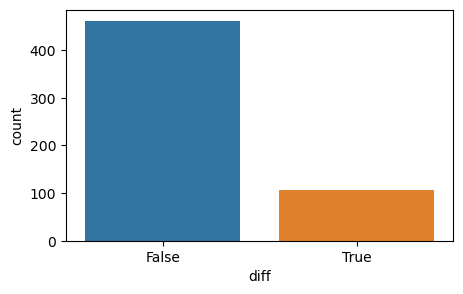

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (5, 3))
sns.countplot(x = result['diff'])
plt.show()

In [3]:
tf.__version__

'2.11.0'